# higher dimensions (or few samples)

* restrict the shape of the covariance matrix 
* restrict the shape of the clusters

In [1]:
import numpy as np

rnd = np.random.RandomState(4)

X1 = rnd.normal(size=(50, 2)) + rnd.normal(scale=10, size=(1, 2))
X2 = rnd.normal(scale=(1, 5), size=(50, 2)) + rnd.normal(scale=(10, 1), size=(1, 2))
X3 = np.dot(rnd.normal(scale=(1, 2), size=(50, 2)), [[1, -1], [1, 1]]) + rnd.normal(scale=(10, 1), size=(1, 2))

X = np.vstack([X1, X2, X3])

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline

from sklearn.mixture import GaussianMixture

def make_ellipses(gmm, ax):
    for n in range(gmm.n_components):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n], v[0], v[1],
                                  180 + angle, color=plt.cm.tab10(n))
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

In [3]:
# Try GMMs using different types of covariances.
estimators = [GaussianMixture(n_components=3, covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']]

estimators

[GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=20,
                 means_init=None, n_components=3, n_init=1, precisions_init=None,
                 random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                 verbose_interval=10, warm_start=False, weights_init=None),
 GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=20,
                 means_init=None, n_components=3, n_init=1, precisions_init=None,
                 random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                 verbose_interval=10, warm_start=False, weights_init=None),
 GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=20,
                 means_init=None, n_components=3, n_init=1, precisions_init=None,
                 random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                 verbose_interval=10, warm_start=False, weights_init=None),
 GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=20,
 

In [4]:
n_estimators = len(estimators)
n_estimators

4

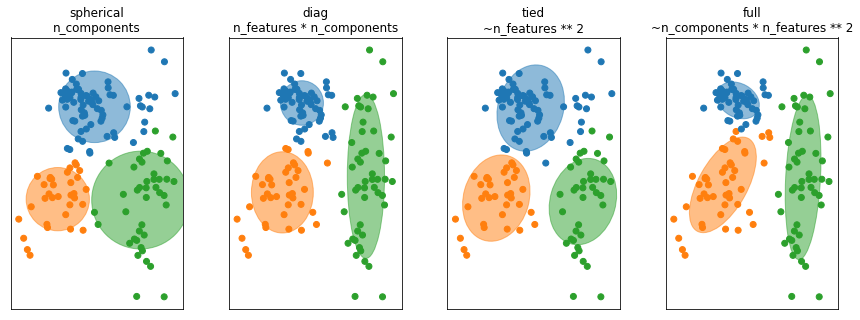

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
titles = ("spherical\nn_components", "diag\nn_features * n_components",
          "tied\n~n_features ** 2", "full\n~n_components * n_features ** 2")

for ax, title, estimator in zip(axes, titles, estimators):
    estimator.fit(X)

    make_ellipses(estimator, ax)

    pred = estimator.predict(X)    
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(pred))

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.set_aspect("equal")

* spherical

    * components = spherical
    * each component has their own covariance (one number for each component)
    * quick but not flexible
    

* diag

    * components = ellipsoids (axis parallel ellipses)
    * variance along the x-axis
    * variance along the y-axis
    * This doesn't grow quadratically with a number of features
    * **useful when we need to invert the cov matrix**


* tied

    * components have the same covariance matrix (symmetric matrix)
    * number of parameters still grows as the number feature squared
    * only useful if you have some a priori knowledge that the clusters should sort of have a similar shape


* full 

    * clusters have independent full covariance matrix
    * hardest to fit & most flexible